In [1]:
# Step 1: Load and Inspect the Data

import pandas as pd

# Load the dataset
file_path = "taxi_tripdata.csv"
data = pd.read_csv(file_path)

# Preview the first few rows
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values in Each Column:")
print(data.isnull().sum())

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in column '{col}':")
    print(data[col].unique())

<ipython-input-1-4c17388db02b>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


First 5 rows of the dataset:
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       1.0  2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1       2.0  2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2       2.0  2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3       2.0  2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4       2.0  2021-07-01 00:51:32   2021-07-01 00:58:46                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            74           168              1.0           1.20   
1         1.0           116           265              2.0          13.69   
2         1.0            97            33              1.0           0.95   
3         1.0            74            42              1.0           1.24   
4         1.0            42           244              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  t

Lets Clean the Data

In [2]:
import pandas as pd


data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'], errors='coerce')
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'], errors='coerce')


print(f"Number of duplicate rows before removal: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")


missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


threshold = 0.5
columns_to_drop = missing_values[missing_values / len(data) > threshold].index
print(f"Columns with >50% missing values: {columns_to_drop.tolist()}")
data = data.drop(columns=columns_to_drop)


numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])


print("Remaining missing values after cleaning:")
print(data.isnull().sum())


data.to_csv("cleaned_taxi_tripdata.csv", index=False)
print("Cleaned data saved to 'cleaned_taxi_tripdata.csv'")

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
Missing values in each column:
VendorID                 32518
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       32518
RatecodeID               32518
PULocationID                 0
DOLocationID                 0
passenger_count          32518
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                83691
improvement_surcharge        0
total_amount                 0
payment_type             32518
trip_type                32518
congestion_surcharge     32518
dtype: int64
Columns with >50% missing values: ['ehail_fee']
Remaining missing values after cleaning:
VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0


Lets start with EDA

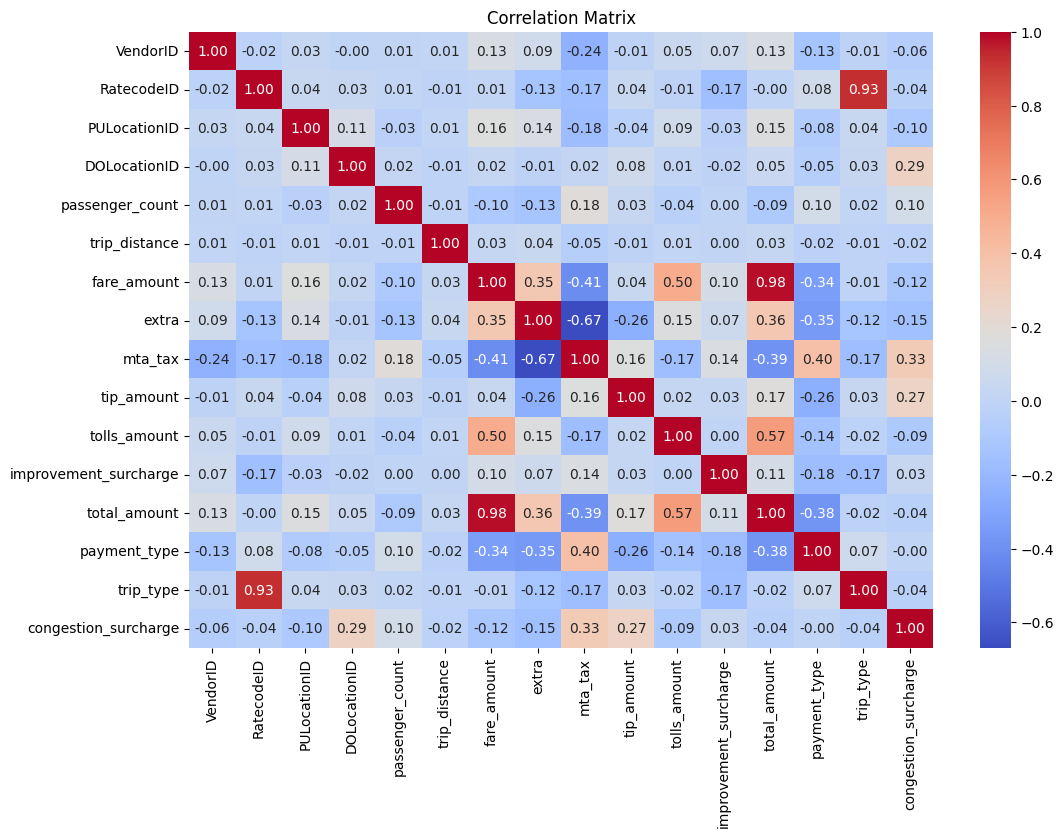

In [4]:

numeric_data = data.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Standardize the Data
Clustering algorithms are sensitive to the scale of data. We need to standardize the features before clustering.

In [5]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for clustering
numeric_columns = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
clustering_data = data[numeric_columns]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

Now Using the Elbow Method to Determine the Optimal Number of Clusters



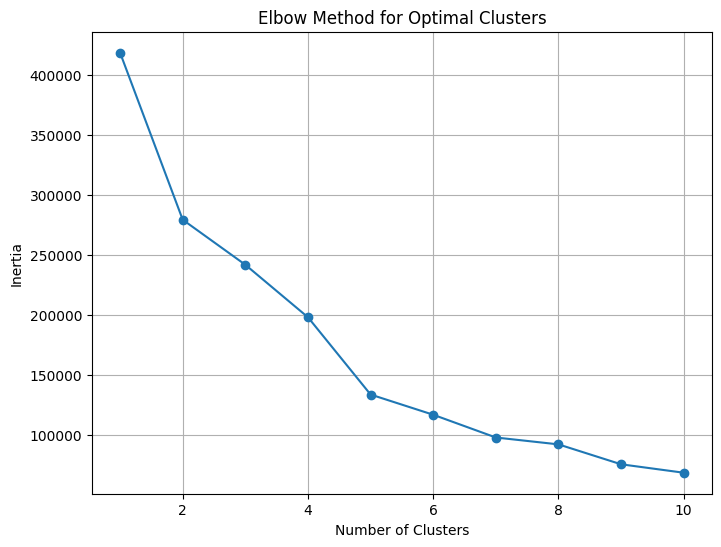

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Performing K-Means Clustering

After determining the optimal number of clusters from the Elbow method, apply K-Means clustering.

In [7]:
# Assuming the optimal number of clusters is 3 (adjust based on the Elbow curve)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
data['Cluster'] = clusters

Visualize Clustering Results WIth below

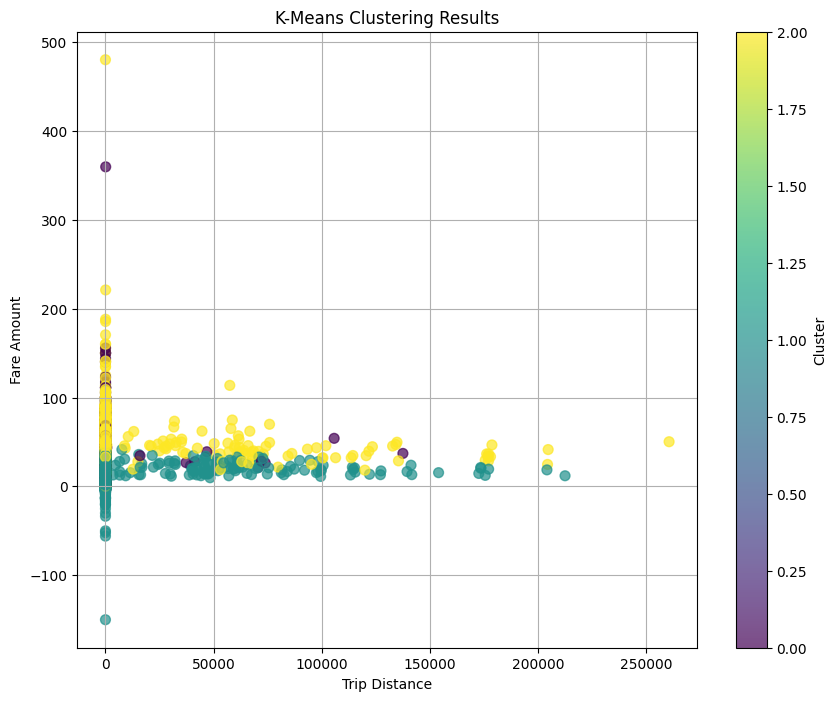

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(data['trip_distance'], data['fare_amount'], c=data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering Results')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Regression Analysis: In This sectioin we will do Regression Analysis

Mean Squared Error (MSE): 238.1178344991719
R-squared (R2): 0.0007103666115033658


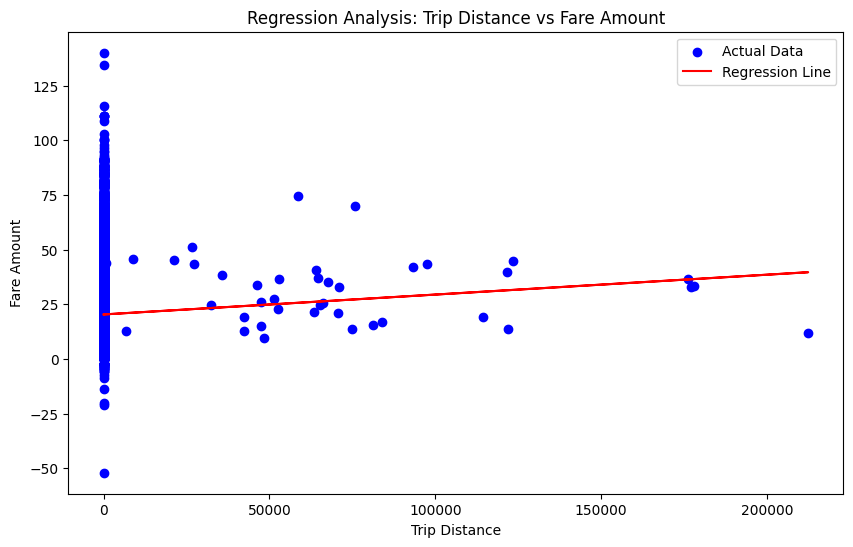

In [9]:
# Step 1: Filter necessary columns and drop NaN values
regression_data = data[['trip_distance', 'fare_amount']].dropna()

# Step 2: Define Independent and Dependent Variables
X = regression_data[['trip_distance']]
y = regression_data['fare_amount']

# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate Model Performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Step 7: Visualize Regression Line
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression Analysis: Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend()
plt.show()

Future Prediction in This section we will do Future Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


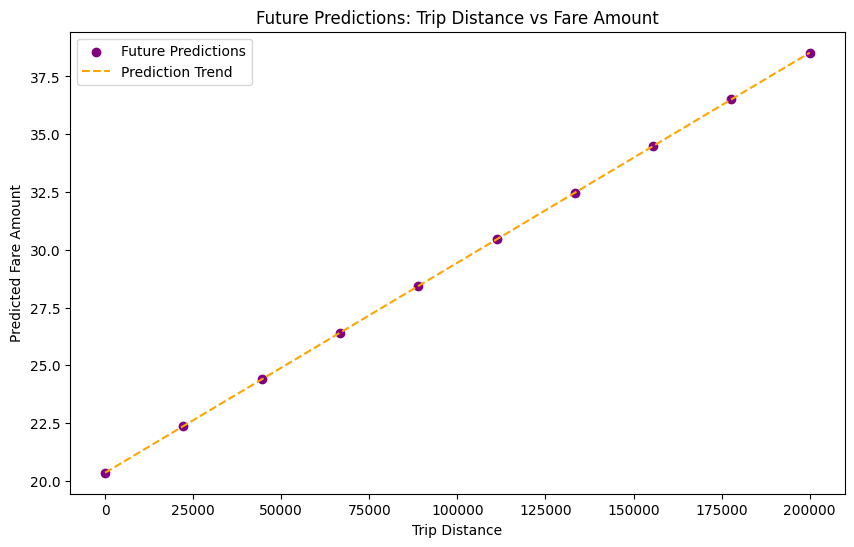

Future Predictions (Trip Distance vs Predicted Fare):
[[0.00000000e+00 2.03545886e+01]
 [2.22222222e+04 2.23735261e+01]
 [4.44444444e+04 2.43924636e+01]
 [6.66666667e+04 2.64114011e+01]
 [8.88888889e+04 2.84303387e+01]
 [1.11111111e+05 3.04492762e+01]
 [1.33333333e+05 3.24682137e+01]
 [1.55555556e+05 3.44871512e+01]
 [1.77777778e+05 3.65060887e+01]
 [2.00000000e+05 3.85250263e+01]]


In [10]:
# Step 1: Generate Future Trip Distances
import numpy as np

future_trip_distances = np.linspace(0, 200000, 10).reshape(-1, 1)  # 10 evenly spaced values up to 200,000

# Step 2: Predict Future Fare Amounts
future_fare_predictions = model.predict(future_trip_distances)

# Step 3: Visualize Future Predictions
plt.figure(figsize=(10, 6))
plt.scatter(future_trip_distances, future_fare_predictions, color='purple', label='Future Predictions')
plt.plot(future_trip_distances, future_fare_predictions, color='orange', linestyle='--', label='Prediction Trend')
plt.title('Future Predictions: Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Predicted Fare Amount')
plt.legend()
plt.show()

# Step 4: Display Future Predictions
future_predictions = np.hstack((future_trip_distances, future_fare_predictions.reshape(-1, 1)))
print("Future Predictions (Trip Distance vs Predicted Fare):")
print(future_predictions)